# Loading Data

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.3 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.8 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy

In [ ]:
!pip install pykrx
!pip install finance-datareader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet

In [ ]:
path = "/content/drive/MyDrive/Time Series Term Project/"

In [ ]:
data = pd.read_csv(path+"BrentOilPrices.csv")

data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


# Preprocessing

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
x = np.arange(len(df))
label = []
for i in range(len(df)):
  if i%900==0:
    label.append(str(df["Date"][i].year)+str(df["Date"][i].month)+str(df["Date"][i].day))
  else:
    label.append("")

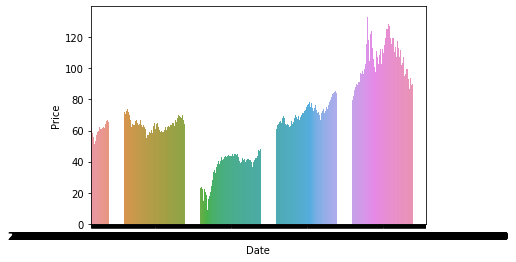

In [ ]:
import pandas as pd
import seaborn as sns

data = df.iloc[-1000:]

# 막대 그래프 (오차범위 포함)
sns.barplot(data=data, x='Date', y='Price')

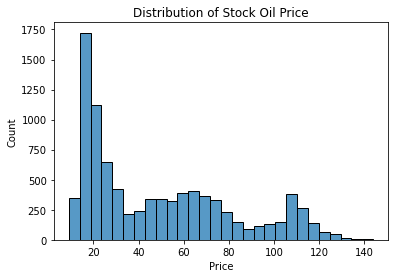

In [ ]:
plt.title("Distribution of Stock Oil Price")
sns.histplot(data['Price'])

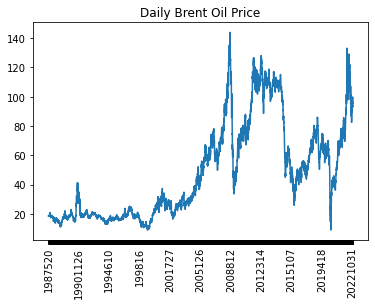

In [ ]:
plt.title("Daily Brent Oil Price")


plt.xticks(x,labels=label,rotation=90)
plt.plot(df["Price"])

In [ ]:
data.rename(columns = {'Date':'ds','Price':'y'},inplace=True)
data

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [ ]:
# 전처리 논의
# 1) "결측치" 처리 : 결측치 0 처리 or 결측치 전날것 사용 or 결측치 다음날 것 사용 or 결측치 평균 내서 사용

model = Prophet()
model.fit(data_)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
data_ = data#[data["ds"]>"20200401"]
data_.reset_index(drop=True, inplace=True)

data_

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [ ]:
trainset = data_.iloc[:int(0.9*len(data_))]
testset = data_.iloc[int(0.9*len(data_)):]
testset.reset_index(drop=True,inplace=True)

In [ ]:
lst = []
for i in range(len(data_)):
  if(i%300==0):
    lst.append(data_["ds"][i])
    #lst.append(str(data_["ds"][i].year)+"."+str(data_["ds"][i].month))

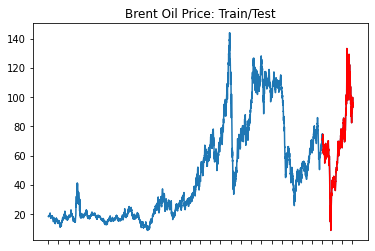

In [ ]:
plt.title("Brent Oil Price: Train/Test")
plt.xticks(ticks=lst,labels=label,rotation=45)
plt.plot(data_['ds'],data_['y'])
plt.plot(testset['ds'],testset['y'],color="r")
plt.locator_params(axis='x', nbins=len(data_)/20)

In [ ]:
data_ = data[data["ds"]>"20200401"]
data_ = data_[data_["ds"]<="20211231"]

data_.reset_index(drop=True,inplace=True)
data_

,ds,y
0,2020-04-02,20.24
1,2020-04-03,24.33
2,2020-04-06,22.58
3,2020-04-07,22.10
4,2020-04-08,25.22
...,...,...
438,2021-12-23,76.26
439,2021-12-24,75.24
440,2021-12-29,78.63
441,2021-12-30,78.61


In [ ]:
model = Prophet()
model.fit(data_)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
data_

,ds,y
0,2020-04-02,20.24
1,2020-04-03,24.33
2,2020-04-06,22.58
3,2020-04-07,22.10
4,2020-04-08,25.22
...,...,...
658,2022-11-08,96.85
659,2022-11-09,93.05
660,2022-11-10,94.25
661,2022-11-11,96.37


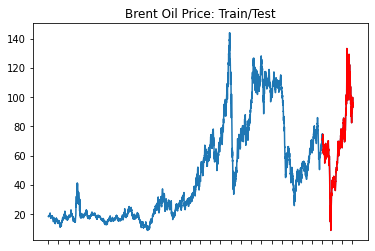

In [ ]:
plt.title("Brent Oil Price: Train/Test")
plt.xticks(ticks=lst,labels=label,rotation=45)
plt.plot(data_['ds'],data_['y'])
plt.plot(testset['ds'],testset['y'],color="r")
plt.locator_params(axis='x', nbins=len(data_)/2)

In [ ]:
model = Prophet()
model.fit(trainset)

future = model.make_future_dataframe(periods=1200)
forecast = model.predict(future)

forecast = forecast[forecast["ds"]<="2022-11-14"]

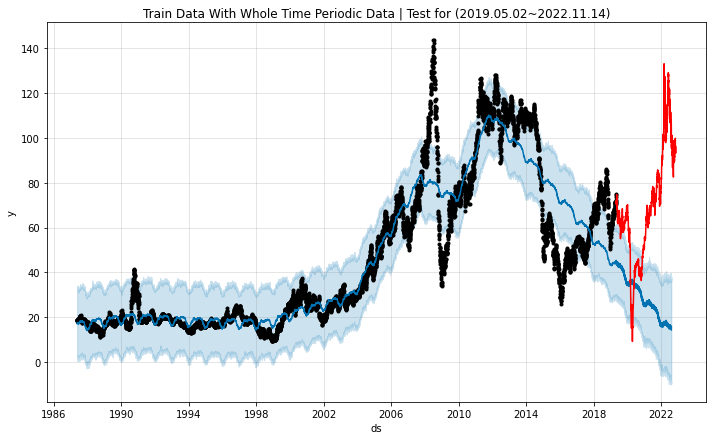

In [ ]:
fig1 = model.plot(forecast)
plt.title("Train Data With Whole Time Periodic Data | Test for (2019.05.02~2022.11.14)")
plt.plot(testset['ds'],testset['y'],color="r")

In [ ]:
y_true = testset['y'].values
y_pred = forecast['yhat'][-len(y_true):].values

from sklearn.metrics import mean_absolute_error

print("[Whole Time Data Method]")
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

[Whole Time Data Method]
MAE: 45.282


In [ ]:
f = forecast[len(trainset):].reset_index(drop=True)

In [ ]:
from pykrx import bond, stock
futures = stock.get_etf_ohlcv_by_date("20101207","20221114",ticker="261220")["종가"]

In [ ]:
futures = pd.DataFrame(futures)

In [ ]:
futures["Date"] = futures.index

In [ ]:
futures.columns={"Future","Date"}

In [ ]:
futures['Date'] = pd.to_datetime(futures['Date'])

In [ ]:
futures.index = pd.to_datetime(futures['Date'])

In [ ]:
futures[futures["Date"]==f["ds"][2]]["Future"][0]

11865

In [ ]:
lst = []
lst.append("b")
print(lst)
del lst[0]
print(lst)

['b']
[]


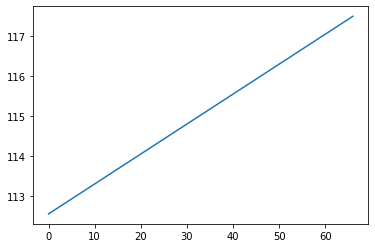

In [ ]:
plt.plot(f['trend'])

In [ ]:
trade_log = []
buy_sell = []
returns = []

futures

for i in range(1,len(f)):
  if(f["trend"][i]>f["trend"][i-1]):
    if(len(buy_sell)==0):
      try:
        buy_price = futures[futures["Date"]==f["ds"][i]]["Future"][0]
        trade_log.append(str(f["ds"][i]) + f":BUY,price:{buy_price}")
        buy_sell.append("BUY")
      except:
        continue

  elif(f["trend"][i]<f["trend"][i-1]):
    if(len(buy_sell)>0):
      sell_price = futures[futures["Date"]==f["ds"][i]]["Future"][0]
      trade_log.append(str(f["ds"][i])+f":SELL,price:{sell_price}")
      del buy_sell[0]
      returns.append(sell_price/buy_price)

  if(i==len(f)-1):
    print(len(buy_sell)>0)
    if(len(buy_sell)>0):
      sell_price = futures[futures["Date"]>=f["ds"][i]]["Future"][0]
      trade_log.append(str(futures[futures["Date"]>=f["ds"][i]]["Date"][0])+f":SELL,price:{sell_price}")
      del buy_sell[0]
      returns.append(sell_price/buy_price)

In [ ]:
print("#######BackTesting#######")
print("Trade Log:")
for i in trade_log:
  print(i)
print("\nReturns:",returns)

#######BackTesting#######
Trade Log:

Returns: []


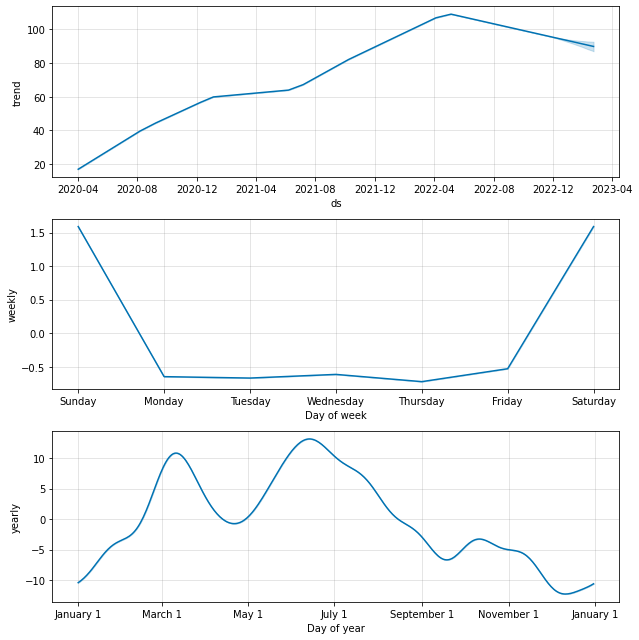

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
# Hyper Parameter Tuning

# changepoint_prior_scale : 값 높이면 모델이 더욱 민감하게 change point(Trend 변화 지점)에 반응
# seasonality_prior_scale : Seasonality 의 모델 반영 강도 조절

# Trend 관련 Parameter

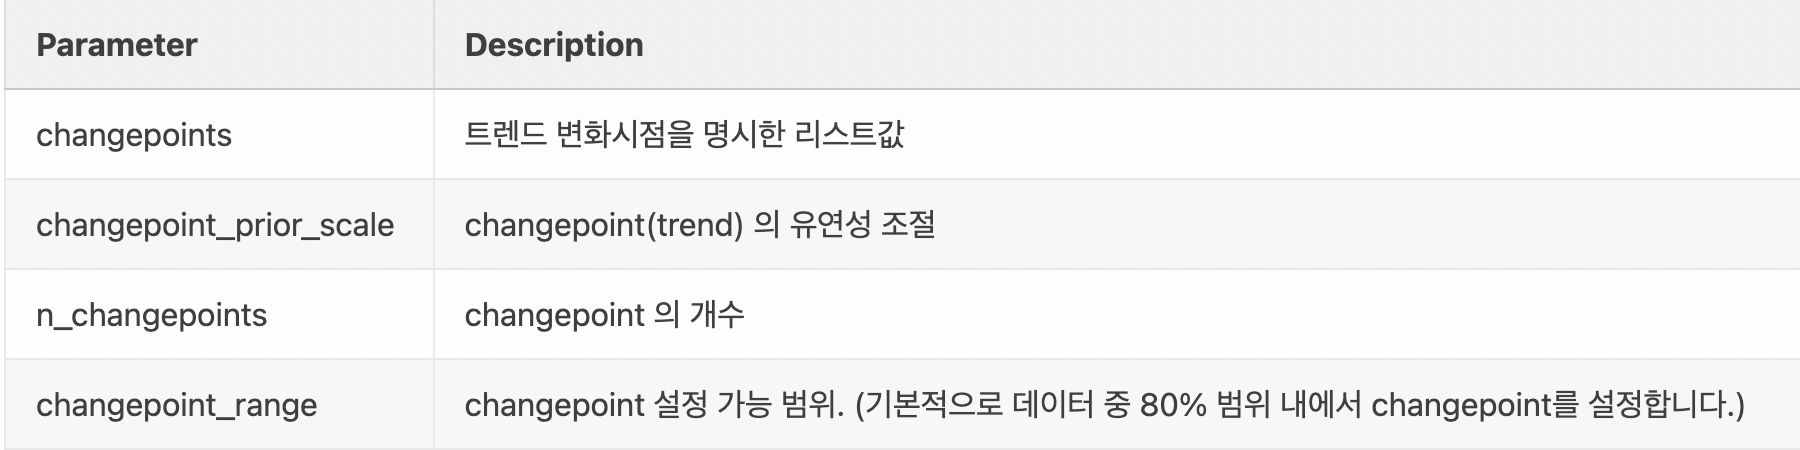

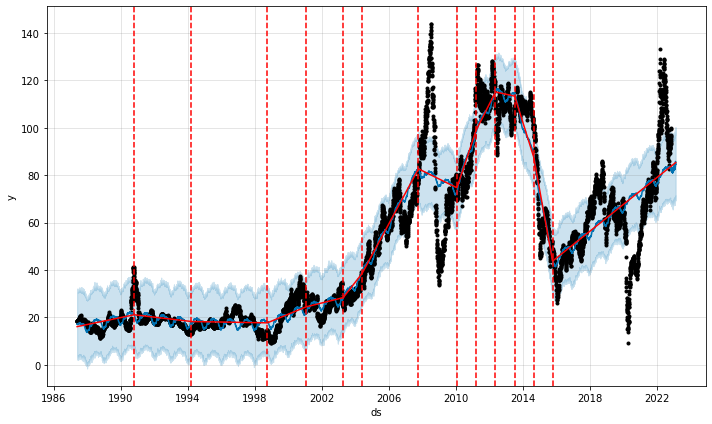

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


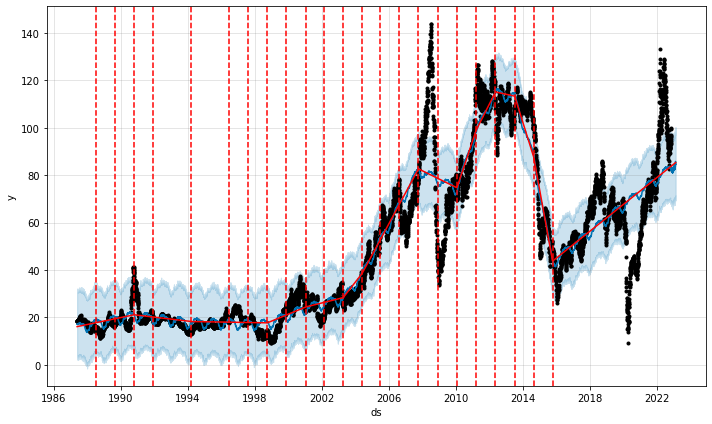

In [ ]:
# changepoint_prior_scale 값 너무 높이면 overfitting 문제 발생 가능
model = Prophet(changepoint_prior_scale=0.3)
model.fit(df)

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

# Seasonality 관련 parameter

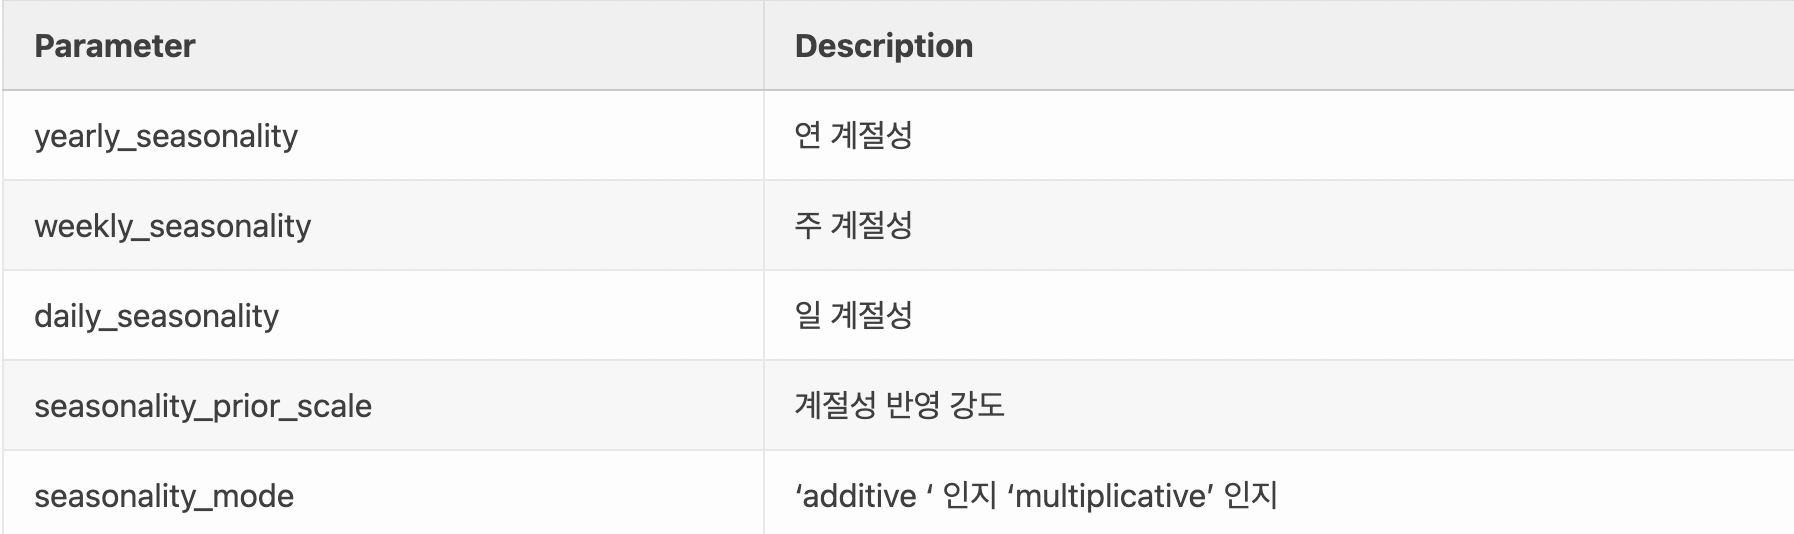

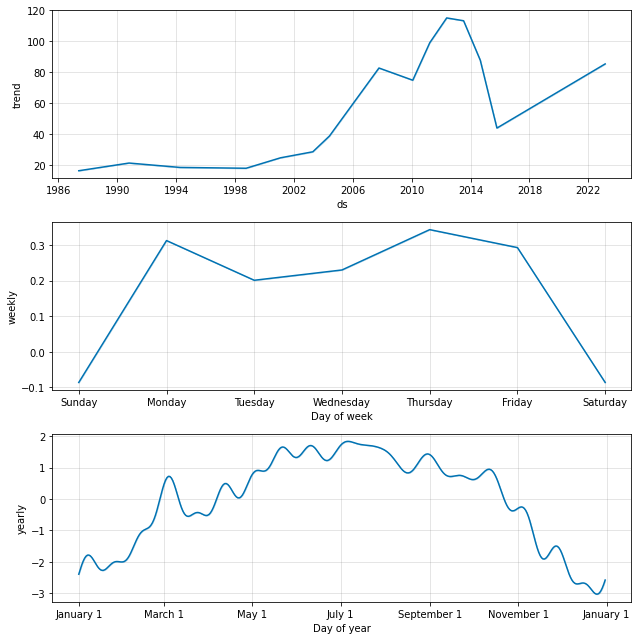

In [ ]:
# weekly_seasonality & yearly_seasonality : default = 10

model = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

model.fit(df)
fig = model.plot_components(forecast)

# Test

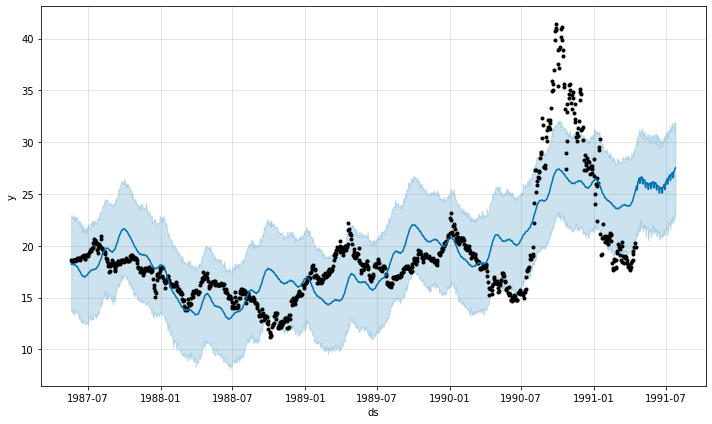

In [ ]:
future = model.make_future_dataframe(periods=100,freq="D")
forecast = model.predict(future)

fig1 = model.plot(forecast)

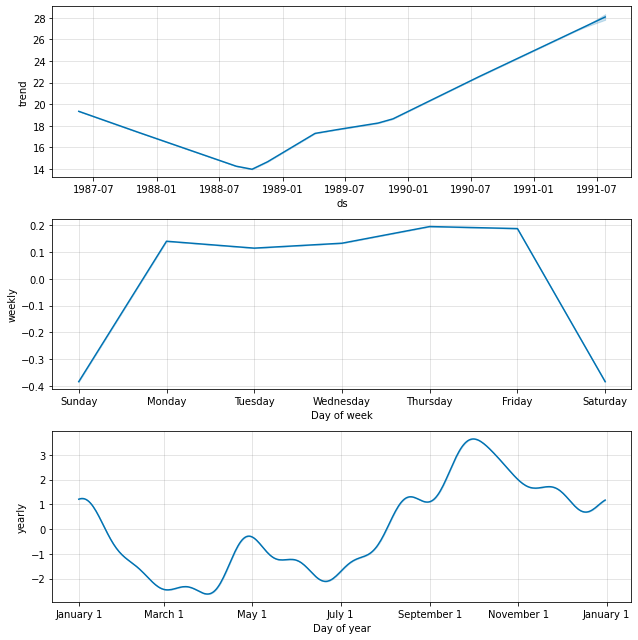

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
# Best Model 선정 기준? Model 정량적 평가?

from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='90 days', horizon = '30 days')
df_cv.head()


INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-07-27 00:00:00 and 2022-10-15 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-28,43.215165,41.552506,44.977055,43.11,2020-07-27
1,2020-07-29,43.637742,41.861844,45.498803,43.51,2020-07-27
2,2020-07-30,43.307785,41.558736,45.060328,42.98,2020-07-27
3,2020-07-31,44.318833,42.535967,46.087147,43.13,2020-07-27
4,2020-08-03,45.500139,43.736603,47.145023,43.76,2020-07-27


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,9.516541,3.084889,2.529320,0.031334,0.031648,0.646259
1,4 days,11.233277,3.351608,2.720497,0.035300,0.036514,0.577381
2,5 days,19.692800,4.437657,3.279837,0.042501,0.037663,0.464286
3,6 days,23.610376,4.859051,3.780512,0.051035,0.040460,0.333333
4,7 days,28.163902,5.306967,4.282950,0.056389,0.044807,0.238095


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


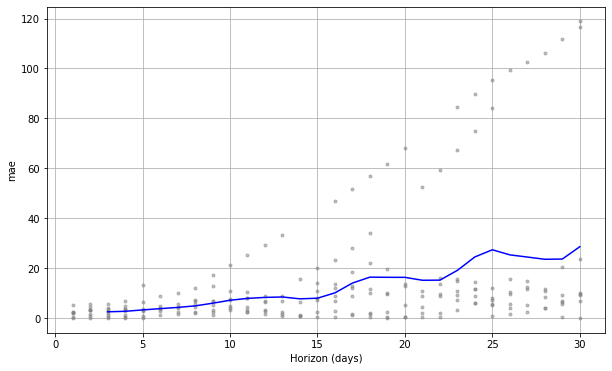

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mae')

# Correlation

In [ ]:
from pykrx import stock
from pykrx import bond

In [ ]:
Df = stock.get_market_ohlcv("20200720", "20220810", "261220")
Df

""


In [ ]:
import FinanceDataReader as fdr

In [ ]:
Df = fdr.DataReader('261220', '2017')
Df["Close"]

Date
2017-01-02    20345
2017-01-03    20360
2017-01-04    19900
2017-01-05    20045
2017-01-06    20225
              ...  
2022-11-22    14650
2022-11-23    14815
2022-11-24    14245
2022-11-25    14345
2022-11-28    13620
Name: Close, Length: 1452, dtype: int64

In [ ]:
d1 = df.iloc[7772:,:]
d1 = d1.reset_index(drop=True)

d1

,Date,Price
0,2018-01-02,66.65
1,2018-01-03,67.85
2,2018-01-04,68.73
3,2018-01-05,68.01
4,2018-01-08,68.48
...,...,...
1234,2022-11-08,96.85
1235,2022-11-09,93.05
1236,2022-11-10,94.25
1237,2022-11-11,96.37


In [ ]:
d2 = fdr.DataReader('261220', '20180102')
d2 = d2["Close"]

d2

Date
2018-01-02    20895
2018-01-03    20770
2018-01-04    21380
2018-01-05    21320
2018-01-08    21180
              ...  
2022-11-22    14650
2022-11-23    14815
2022-11-24    14245
2022-11-25    14345
2022-11-28    13620
Name: Close, Length: 1209, dtype: int64

In [ ]:
d2["Date"]=d2.index

In [ ]:
Day = []; Data1 = []; Data2 = []
for i in range(len(d1)):
  if(d1["Date"][i]==d2["Date"][i]):
    Day.append(d1["Date"][i])
    Data1 =

# 주식 선물/현물 관계

In [ ]:
from pykrx import stock
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd

In [ ]:
tickers = stock.get_etf_ticker_list("20201119")
tickers=pd.DataFrame(tickers,columns=['종목코드'])

url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df = json_normalize(json_data['result']['etfItemList'])
df=df[['itemcode','itemname']]
df=df.rename(columns={"itemcode": "종목코드", "itemname": "종목명"})

etf=pd.merge(left=ticxzkers,right=df,how='left',on='종목코드' )
game_etf=etf[etf['종목명'].str.contains('원유')][1:]

<ipython-input-12-92d7dcaf54e3>:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json_data['result']['etfItemList'])


In [ ]:
from pykrx import stock

futures = stock.get_etf_ohlcv_by_date("20100101",
              "20221114",ticker="261220")["종가"]
futures = pd.DataFrame(futures)
futures["Date"] = futures.index

print(futures.head(5))
print(futures.tail(5))

               종가       Date
날짜                          
2016-12-27  20055 2016-12-27
2016-12-28  20285 2016-12-28
2016-12-29  20300 2016-12-29
2017-01-02  20345 2017-01-02
2017-01-03  20360 2017-01-03
               종가       Date
날짜                          
2022-11-08  16525 2022-11-08
2022-11-09  16060 2022-11-09
2022-11-10  15545 2022-11-10
2022-11-11  16020 2022-11-11
2022-11-14  16050 2022-11-14


Text(0, 0.5, 'Close Price')

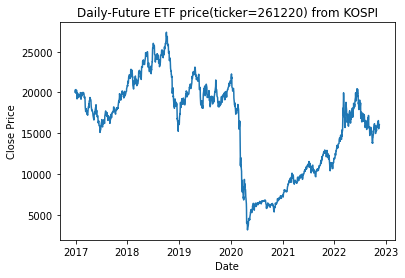

In [ ]:
plt.title("Daily-Future ETF price(ticker=261220) from KOSPI")
plt.plot(futures["Date"],futures["종가"])
plt.xlabel("Date")
plt.ylabel("Close Price")

In [ ]:
d = data

d = d[d["Date"]>="2016-12-27"]
d = d.reset_index(drop=True)

In [ ]:
d.index = d["Date"]

In [ ]:
futures.columns = {}
d.columns = {}

In [ ]:
corr = []
idx = []
max_corr = 0; max_i = 0
for i in range(1000):
  data = d.iloc[i:]
  DF = pd.merge(futures["종가"], data["Price"],left_index=True, right_index=True,how='right')
  c = DF.corr(method="pearson")["Price"]["종가"]
  corr.append(c)
  idx.append(i)
  if c>max_corr:
    max_corr = c
    max_i = i

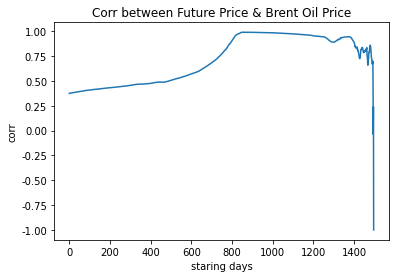

In [ ]:
plt.title("Corr between Future Price & Brent Oil Price")
plt.xlabel("staring days")
plt.ylabel("corr")
plt.plot(idx,corr)

In [ ]:
DF = pd.merge(futures["종가"], d["Price"],left_index=True, right_index=True,how='right')

In [ ]:
DF.columns={"Futures","Brent Oil"}

In [ ]:
DF_logret = np.log(DF / DF.shift(1))
DF_logret = DF_logret.dropna()

In [ ]:
DF.corr("pearson")

,Futures,Brent Oil
Futures,1.000000,0.375554
Brent Oil,0.375554,1.000000


In [ ]:
DF_logret.corr("pearson")

,Futures,Brent Oil
Futures,1.00000,0.21138
Brent Oil,0.21138,1.00000


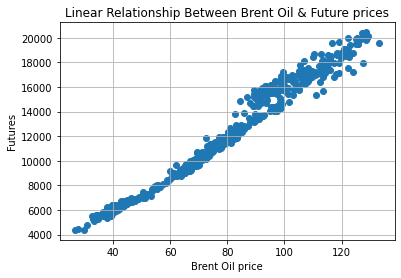

In [ ]:
plt.scatter(x = DF['Brent Oil'][860:], y =DF['Futures'][860:])
plt.title("Linear Relationship Between Brent Oil & Future prices(2020.05.12.~)")
plt.xlabel("Brent Oil price")
plt.ylabel("Futures")
plt.grid()
plt.show()

In [ ]:
incr_F = []; incr_B = []
decr_F = []; decr_B = []
for i in range(1,len(DF)):
  if(DF["Futures"][i]>DF["Futures"][i-1] and DF["Brent Oil"][i]>DF["Brent Oil"][i-1]):
    incr_F.append(DF["Futures"][i])
    incr_B.append(DF["Brent Oil"][i])
  if(DF["Futures"][i]<DF["Futures"][i-1] and DF["Brent Oil"][i]<DF["Brent Oil"][i-1]):
    decr_F.append(DF["Futures"][i])
    decr_B.append(DF["Brent Oil"][i])

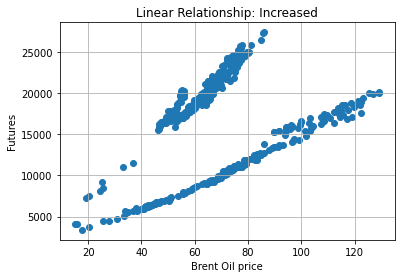

In [ ]:
plt.scatter(x = incr_B, y =incr_F)
plt.title("Linear Relationship: Increased")
plt.xlabel("Brent Oil price")
plt.ylabel("Futures")
plt.grid()
plt.show()

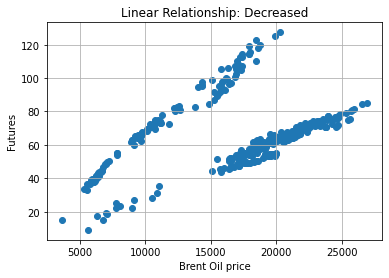

In [ ]:
plt.scatter(x = decr_F, y =decr_B)
plt.title("Linear Relationship: Decreased")
plt.xlabel("Brent Oil price")
plt.ylabel("Futures")
plt.grid()
plt.show()

In [ ]:
DF

,Futures,Brent Oil
Date,,
2016-12-28,20285.0,54.95
2016-12-29,20300.0,54.97
2016-12-30,20300.0,54.96
2017-01-03,20360.0,55.05
2017-01-04,19900.0,54.57
...,...,...
2022-11-08,16525.0,96.85
2022-11-09,16060.0,93.05
2022-11-10,15545.0,94.25


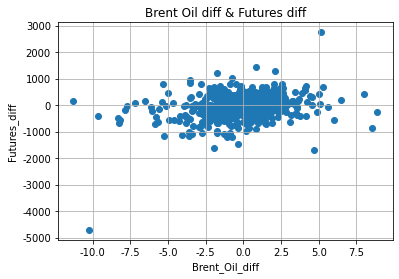

In [ ]:
plt.plot()
plt.title("Brent Oil diff & Futures diff")
plt.xlabel("Brent_Oil_diff")
plt.ylabel("Futures_diff")
plt.scatter(x = DF['Brent Oil'].diff(), y = DF['Futures'].diff())
plt.grid()
plt.show()

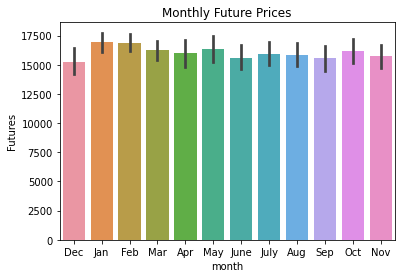

In [ ]:
import pandas as pd
import seaborn as sns

#data = sns.load_dataset("flights")
#flights = pd.DataFrame(data)

# 막대 그래프 (오차범위 포함)
plt.title("Monthly Future Prices")
sns.barplot(data=DF, x='month', y='Futures')
#sns.lineplot(data=DF, x='year', y='Futures', hue='month', palette='ch:.50')

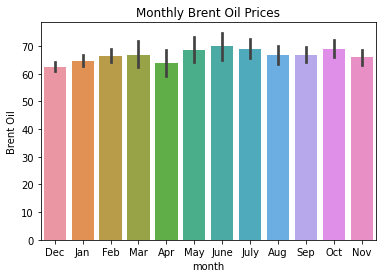

In [ ]:
plt.title("Monthly Brent Oil Prices")
sns.barplot(data=DF, x='month', y='Brent Oil')

In [ ]:
months = []; years = []
for i in range(len(DF)):
  if(DF.index[i].month==1): months.append("Jan")
  elif(DF.index[i].month==2): months.append("Feb")
  elif(DF.index[i].month==3): months.append("Mar")
  elif(DF.index[i].month==4): months.append("Apr")
  elif(DF.index[i].month==5): months.append("May")
  elif(DF.index[i].month==6): months.append("June")
  elif(DF.index[i].month==7): months.append("July")
  elif(DF.index[i].month==8): months.append("Aug")
  elif(DF.index[i].month==9): months.append("Sep")
  elif(DF.index[i].month==10): months.append("Oct")
  elif(DF.index[i].month==11): months.append("Nov")
  elif(DF.index[i].month==12): months.append("Dec")
  years.append(int(DF.index[i].year))

In [ ]:
DF["year"]=years
DF["month"]=months

In [ ]:
DF.to_csv("whole_period.csv")

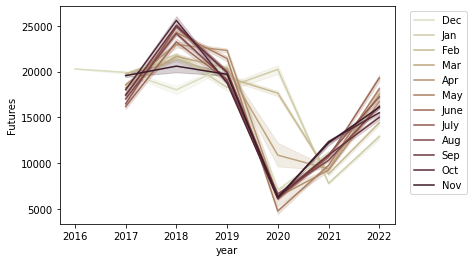

In [ ]:
sns.lineplot(data=DF, x='year', y='Futures', hue='month', palette='ch:.50')

# legend 그래프 밖에 추가하기
plt.legend(bbox_to_anchor=(1.03, 1), loc=2)

In [ ]:
future

날짜
2018-12-07    18310
2018-12-10    18825
2018-12-11    18320
2018-12-12    18740
2018-12-13    18430
              ...  
2022-11-08    16525
2022-11-09    16060
2022-11-10    15545
2022-11-11    16020
2022-11-14    16050
Name: 종가, Length: 970, dtype: uint32

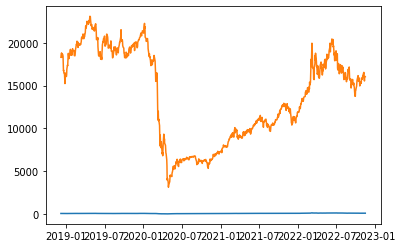

In [ ]:
plt.plot(data["Price"])
plt.plot(future)

In [ ]:
DF.columns={"Future","Crude Oil"}

In [ ]:
DF

,Future,Crude Oil
Date,,
2018-12-07,18310.0,61.71
2018-12-10,18825.0,60.29
2018-12-11,18320.0,59.73
2018-12-12,18740.0,59.94
2018-12-13,18430.0,59.03
...,...,...
2022-11-08,16525.0,96.85
2022-11-09,16060.0,93.05
2022-11-10,15545.0,94.25


In [ ]:
DF.corr(method="pearson")

,Future,Crude Oil
Future,1.000000,0.503987
Crude Oil,0.503987,1.000000


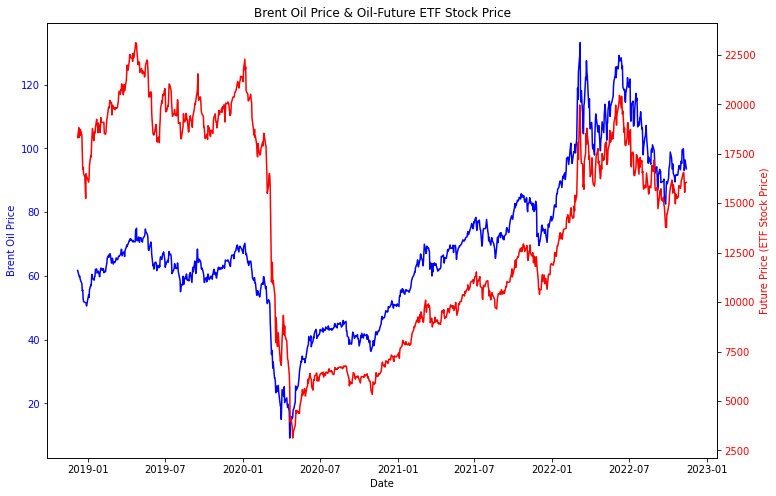

In [ ]:
fig = plt.figure(figsize=(12,8)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성

plt.title("Brent Oil Price & Oil-Future ETF Stock Price")

color1 = 'b'
ax1.plot(data["Price"], color=color1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Brent Oil Price', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(future, color=color2)
ax2.set_ylabel('Future Price (ETF Stock Price)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

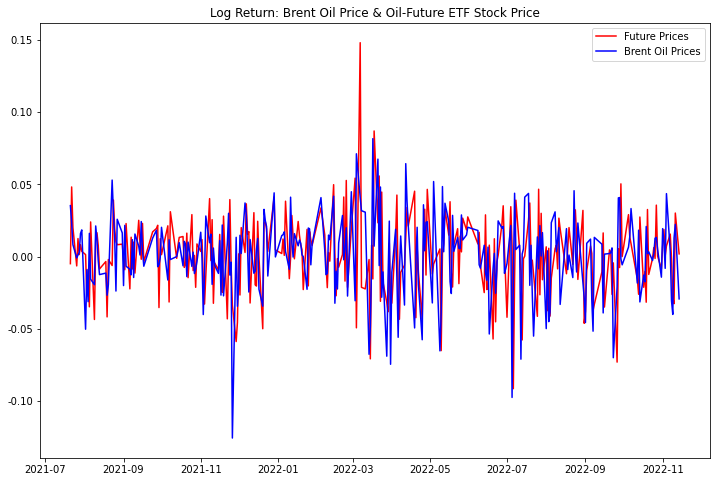

In [ ]:
fig = plt.figure(figsize=(12,8)) ## 캔버스 생성
plt.title("Log Return: Brent Oil Price & Oil-Future ETF Stock Price")
plt.plot(DF_logret["Futures"][-300:],color="r",label="Future Prices")
plt.plot(DF_logret["Brent Oil"][-300:],color="b",label="Brent Oil Prices")
plt.legend()